<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/KMeansClustering/countryclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#import 
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as exp
from sklearn.cluster import KMeans as KM
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SS
from matplotlib import cm
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
files.upload()

In [42]:
data = pd.read_csv('country.csv')
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


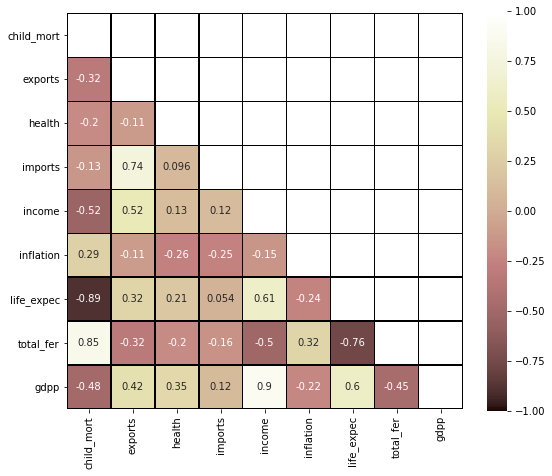

In [43]:
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(8,8))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.pink,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [44]:
ss = SS()
countries = data['country']
data = data.drop(columns=['country'],axis=1)
data = ss.fit_transform(data)

In [45]:
ssd = []
for k in range(1,10):
    km = KM(n_clusters=k)
    km = km.fit(data)
    ssd.append(km.inertia_) 

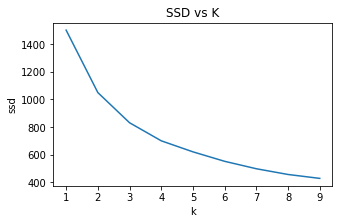

In [27]:
fig = plt.figure(figsize=(5,3))
plot = fig.add_subplot(1,1,1)
sns.lineplot(x=range(1,10), y=ssd, ax=plot)
plot.set_xlabel('k')
plot.set_ylabel('ssd')
plot.set_title('SSD vs K')
plt.show()

In [63]:
km = KM(n_clusters=3)
km.fit(data)
predictions = km.labels_
for i in range(167):
  print(countries[i], predictions[i])

Afghanistan 2
Albania 0
Algeria 0
Angola 2
Antigua and Barbuda 0
Argentina 0
Armenia 0
Australia 1
Austria 1
Azerbaijan 0
Bahamas 0
Bahrain 1
Bangladesh 0
Barbados 0
Belarus 0
Belgium 1
Belize 0
Benin 2
Bhutan 0
Bolivia 0
Bosnia and Herzegovina 0
Botswana 2
Brazil 0
Brunei 1
Bulgaria 0
Burkina Faso 2
Burundi 2
Cambodia 0
Cameroon 2
Canada 1
Cape Verde 0
Central African Republic 2
Chad 2
Chile 0
China 0
Colombia 0
Comoros 2
Congo, Dem. Rep. 2
Congo, Rep. 2
Costa Rica 0
Cote d'Ivoire 2
Croatia 0
Cyprus 1
Czech Republic 1
Denmark 1
Dominican Republic 0
Ecuador 0
Egypt 0
El Salvador 0
Equatorial Guinea 2
Eritrea 2
Estonia 0
Fiji 0
Finland 1
France 1
Gabon 2
Gambia 2
Georgia 0
Germany 1
Ghana 2
Greece 1
Grenada 0
Guatemala 0
Guinea 2
Guinea-Bissau 2
Guyana 0
Haiti 2
Hungary 0
Iceland 1
India 0
Indonesia 0
Iran 0
Iraq 2
Ireland 1
Israel 1
Italy 1
Jamaica 0
Japan 1
Jordan 0
Kazakhstan 0
Kenya 2
Kiribati 2
Kuwait 1
Kyrgyz Republic 0
Lao 2
Latvia 0
Lebanon 0
Lesotho 2
Liberia 2
Libya 0
Lithuani